In [15]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('./dataset/mapeList.csv')

df.head(10)

,distance,param,mape
0,1,0.1,8.607316
1,1,0.2,7.935104
2,1,0.3,19.761125
3,1,0.4,5.143945
4,1,0.5,9.256525
5,1,0.6,17.777099
6,1,0.7,14.860334
7,1,0.8,12.150600
8,1,0.9,5.598367
9,6,0.1,7.922422


ValueError: cannot reshape array of size 234 into shape (234,234)

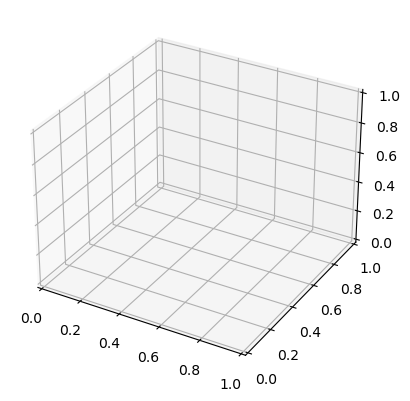

In [6]:
# 3D 플롯을 평면으로 표시하기 위해 surface plot 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 평면을 그리기 위한 그리드 생성
X, Y = np.meshgrid(df['distance'], df['param'])
Z = df['mape'].values.reshape(X.shape)

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# 레이블 추가
ax.set_xlabel('Distance')
ax.set_ylabel('Param')
ax.set_zlabel('MAPE')

# 플롯 표시
plt.show()


In [13]:
import numpy as np
# 데이터프레임을 pivot하여 각 distance와 param 조합에 대한 mape 값을 얻음
pivot_df = df.pivot('param', 'distance', 'mape')

# pivot된 데이터프레임으로부터 X, Y, Z 데이터 생성
X, Y = np.meshgrid(pivot_df.columns, pivot_df.index)
Z = pivot_df.values

# 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 평면 그래프 생성
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# 레이블 추가
ax.set_xlabel('Distance')
ax.set_ylabel('Param')
ax.set_zlabel('MAPE')

# 색상 막대 추가
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 플롯 표시
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

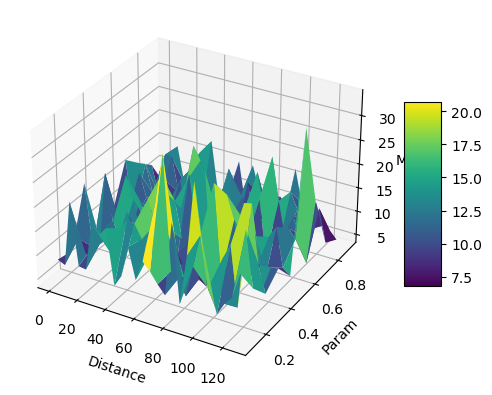

In [14]:
# 데이터프레임을 pivot하여 각 distance와 param 조합에 대한 mape 값을 얻음
pivot_df = df.pivot(index='param', columns='distance', values='mape')

# pivot된 데이터프레임으로부터 X, Y, Z 데이터 생성
X, Y = np.meshgrid(pivot_df.columns, pivot_df.index)
Z = pivot_df.values

# 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 평면 그래프 생성
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# 레이블 추가
ax.set_xlabel('Distance')
ax.set_ylabel('Param')
ax.set_zlabel('MAPE')

# 색상 막대 추가
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 플롯 표시
plt.show()


In [17]:
Z.shape

(9, 26)

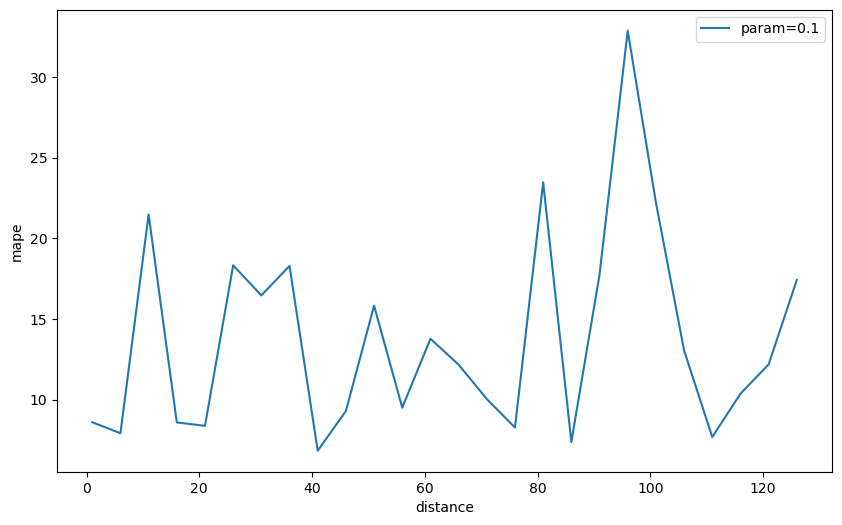

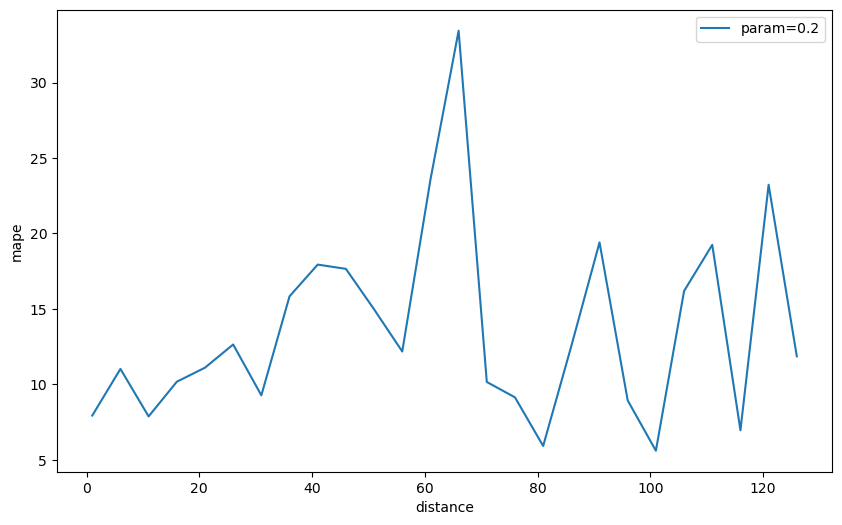

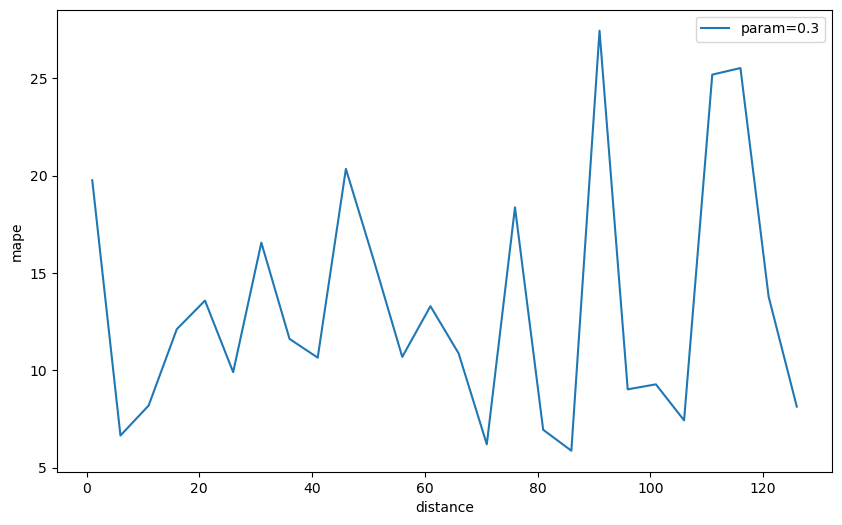

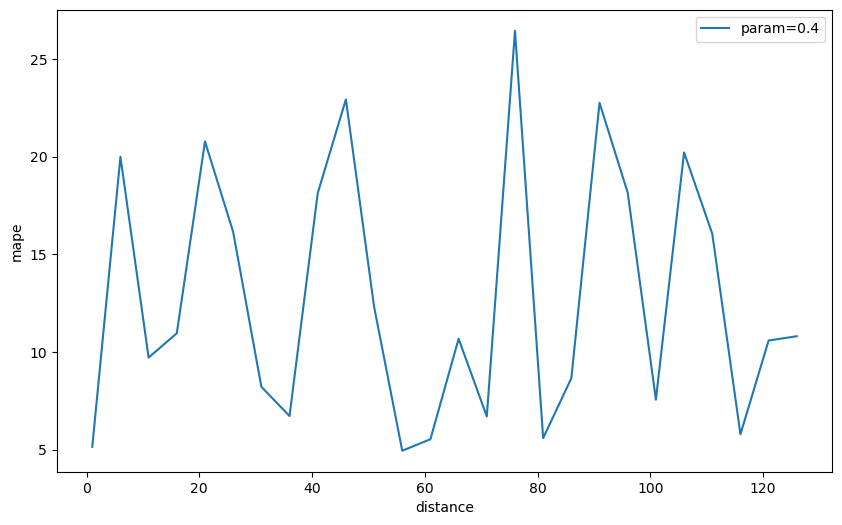

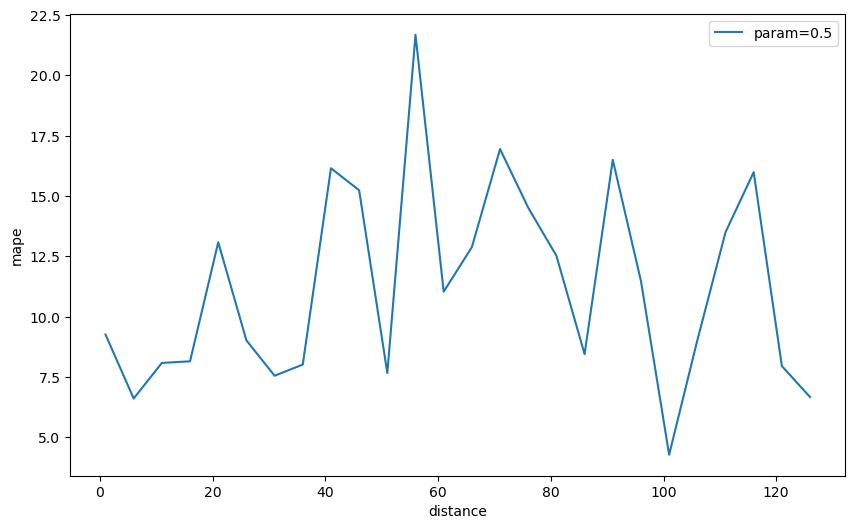

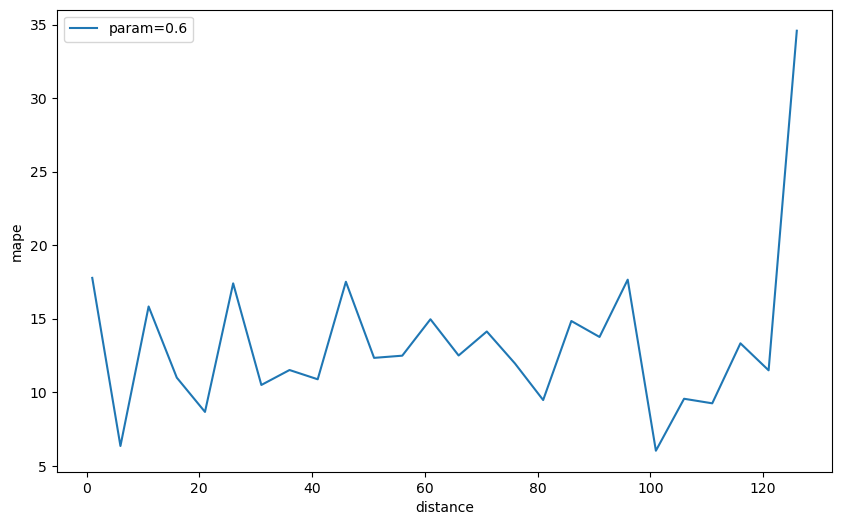

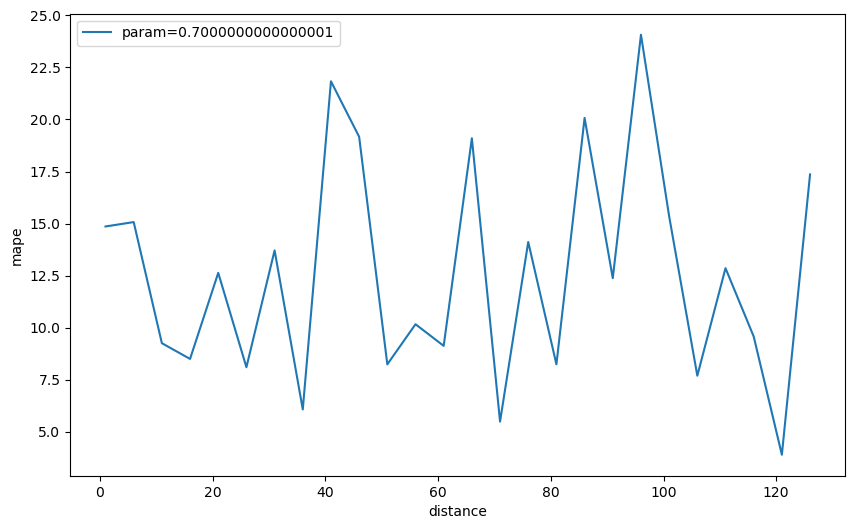

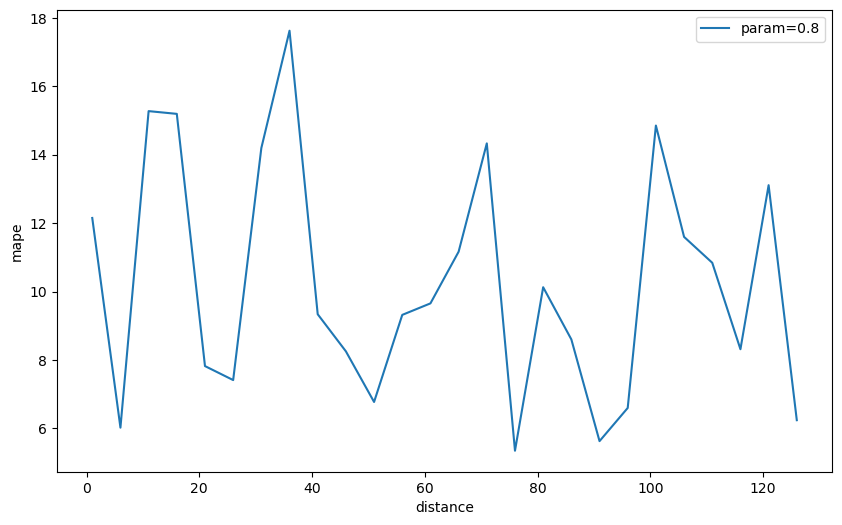

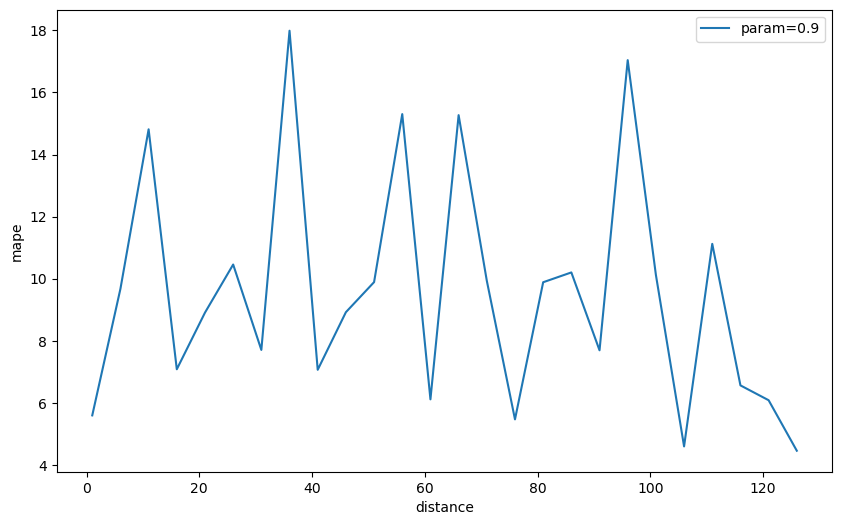

In [19]:
# distance 변화에 따른 mape를 나타낸 2차원 그래프 생성

import seaborn as sns

for param in df['param'].unique():
    # param에 따른 mape를 얻음
    mape = df[df['param'] == param]['mape'].values

    # distance에 따른 mape를 얻음
    distance = df[df['param'] == param]['distance'].values

    # mape와 distance를 1차원으로 변환
    mape = mape.reshape(-1)
    distance = distance.reshape(-1)

    # mape와 distance를 데이터프레임으로 변환
    df2 = pd.DataFrame({'mape': mape, 'distance': distance})

    # distance에 따른 mape 시각화를 위한 2D 그래프 생성
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='distance', y='mape', data=df2, label='param={}'.format(param))